In [1]:
import pandas as pd
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression


In [2]:
df1=pd.read_csv("D:\\AIT614\\Project\\Air_Quality.csv")

In [3]:
#Data Cleaning using python

In [4]:
df1.describe()

,Unique ID,Indicator ID,Geo Join ID,Data Value,Message
count,16218.000000,16218.000000,1.621800e+04,16218.000000,0.0
mean,372730.417746,427.803613,6.097103e+05,19.975917,NaN
std,215507.613560,110.921411,7.893388e+06,21.322349,NaN
min,121644.000000,365.000000,1.000000e+00,0.000000,NaN
25%,173211.250000,365.000000,2.020000e+02,9.050000,NaN
50%,325262.500000,375.000000,3.030000e+02,15.300000,NaN
75%,605270.750000,386.000000,4.040000e+02,26.037500,NaN
max,799868.000000,661.000000,1.051061e+08,424.700000,NaN


In [5]:
df1.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/1/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/1/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,1/1/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,1/1/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/1/2008,22.83,NaN


In [6]:
column_to_drop = 'Message'
df1 = df1.drop(column_to_drop, axis=1)

In [7]:
df1.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/1/2010,25.30
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/1/2008,26.93
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,1/1/2015,19.09
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,1/1/2015,19.76
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/1/2008,22.83


In [8]:
print(df1.isna().sum())

Unique ID         0
Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
dtype: int64


In [9]:
#Data Visualization using python in Notebook

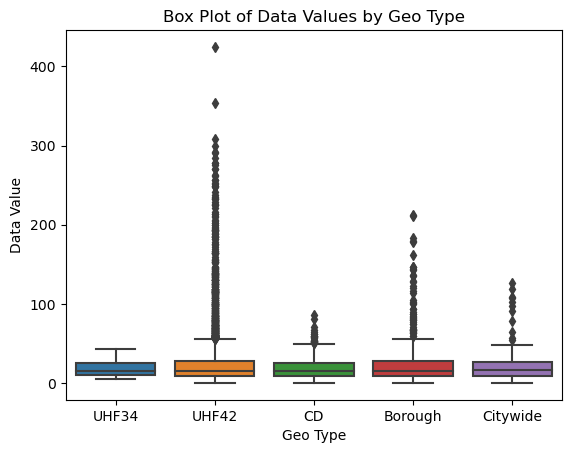

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Geo Type Name', y='Data Value', data=df1)
plt.title('Box Plot of Data Values by Geo Type')
plt.xlabel('Geo Type')
plt.ylabel('Data Value')
plt.show()

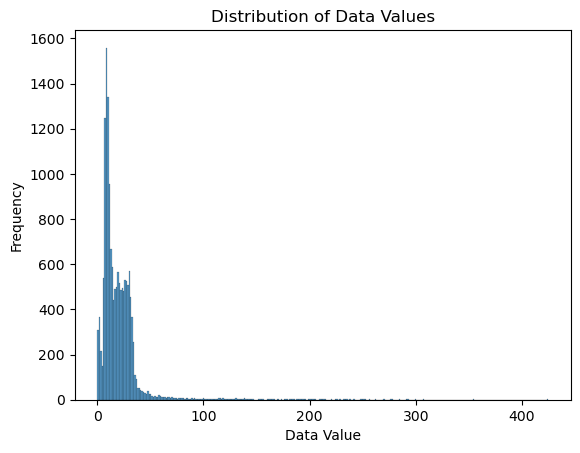

In [11]:
sns.histplot(df1['Data Value'])
plt.title('Distribution of Data Values')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.show()

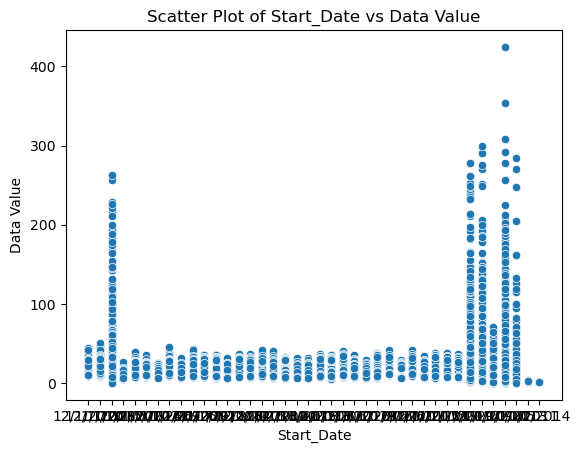

In [12]:
sns.scatterplot(x='Start_Date', y='Data Value', data=df1)
plt.title('Scatter Plot of Start_Date vs Data Value')
plt.xlabel('Start_Date')
plt.ylabel('Data Value')
plt.show()

C:\Users\ojadh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


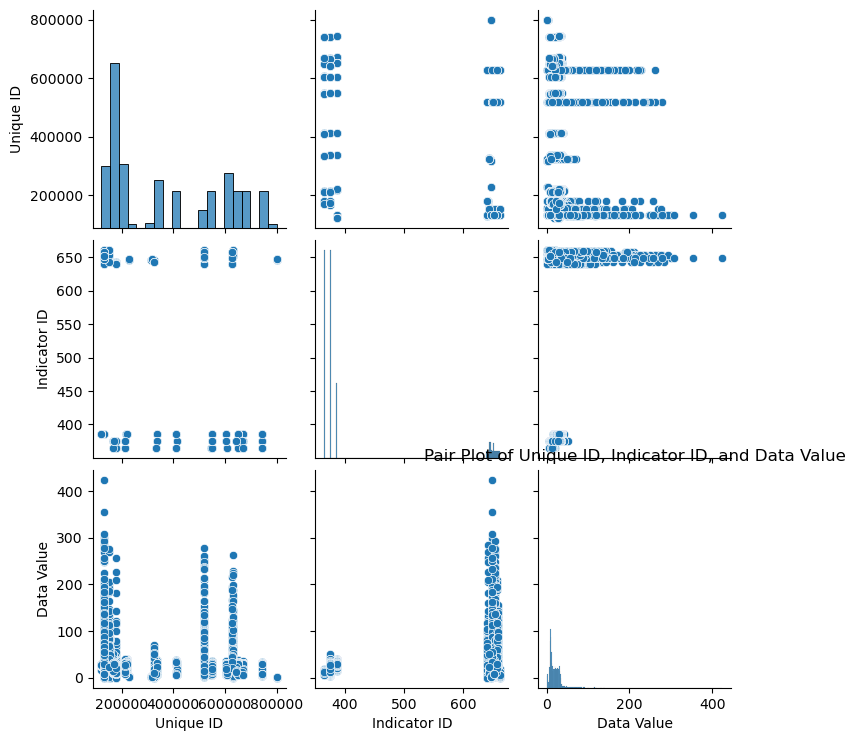

In [13]:
# Assuming 'Feature1', 'Feature2', and 'Feature3' are columns from your dataset
sns.pairplot(df1[['Unique ID', 'Indicator ID', 'Data Value']])
plt.title('Pair Plot of Unique ID, Indicator ID, and Data Value')
plt.show()

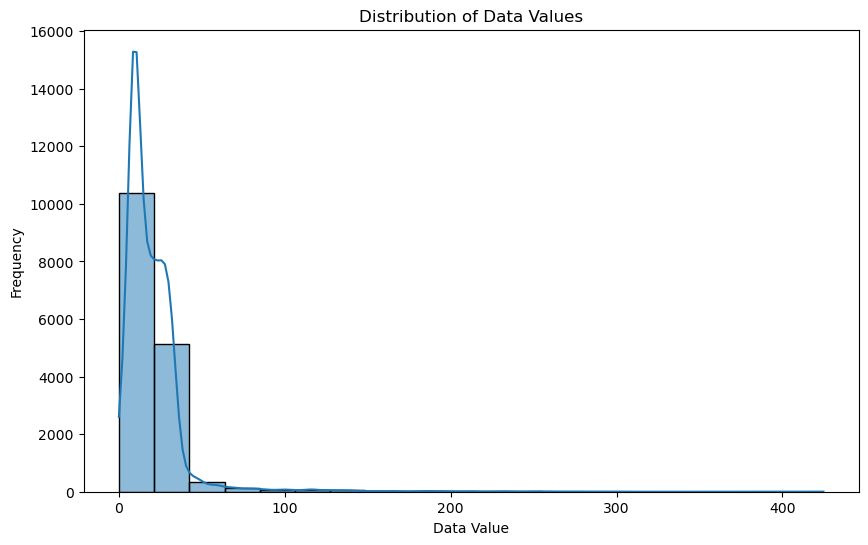

In [14]:
# Histogram of data values
plt.figure(figsize=(10, 6))
sns.histplot(df1['Data Value'], bins=20, kde=True)
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.title('Distribution of Data Values')
plt.show()

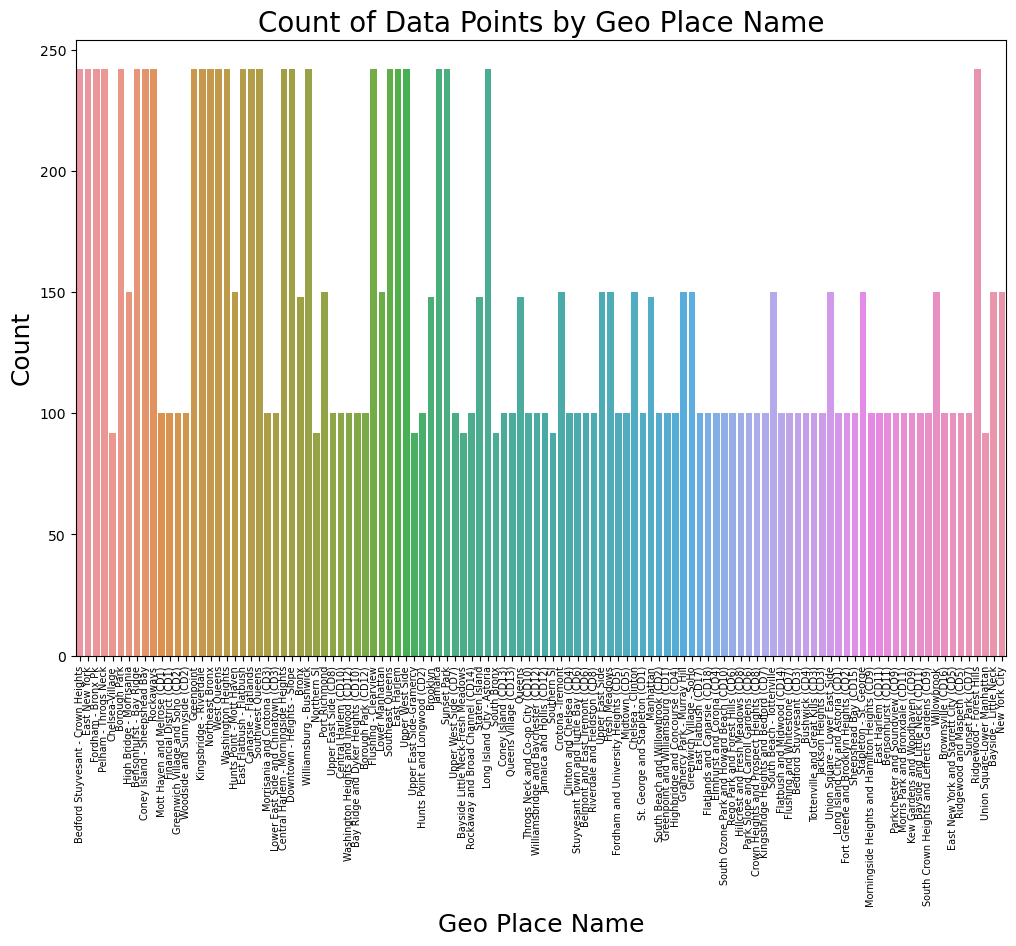

In [15]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Assuming 'Category' is a column from your dataset
sns.countplot(x='Geo Place Name', data=df1)

# Set title and labels with increased font size
plt.title('Count of Data Points by Geo Place Name', fontsize=20)
plt.xlabel('Geo Place Name', fontsize=18)
plt.ylabel('Count', fontsize=18)

# Rotate x-axis labels and increase font size for better readability
plt.xticks(rotation=90, fontsize=7)

# Show plot
plt.show()


In [16]:
#Random Forest regressor using python(Pyspark is attached separately)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Convert data types if needed (e.g., converting 'Data Value' to numeric)
df1['Data Value'] = pd.to_numeric(df1['Data Value'], errors='coerce')

# Split data into features (X) and target (y)
X = df1.drop(['Data Value'], axis=1)  # Features
y = df1['Data Value']  # Target

# Convert categorical variables into dummy/indicator variables if needed
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the processed DataFrame
print("Processed DataFrame:")
print(df1.head())

# Summary statistics of the dataset
print("\nSummary Statistics:")
print(df1.describe())

Processed DataFrame:
   Unique ID  Indicator ID                    Name Measure Measure Info  \
0     172653           375  Nitrogen dioxide (NO2)    Mean          ppb   
1     172585           375  Nitrogen dioxide (NO2)    Mean          ppb   
2     336637           375  Nitrogen dioxide (NO2)    Mean          ppb   
3     336622           375  Nitrogen dioxide (NO2)    Mean          ppb   
4     172582           375  Nitrogen dioxide (NO2)    Mean          ppb   

  Geo Type Name  Geo Join ID                      Geo Place Name  \
0         UHF34          203  Bedford Stuyvesant - Crown Heights   
1         UHF34          203  Bedford Stuyvesant - Crown Heights   
2         UHF34          204                       East New York   
3         UHF34          103                  Fordham - Bronx Pk   
4         UHF34          104                Pelham - Throgs Neck   

           Time Period Start_Date  Data Value  
0  Annual Average 2011  12/1/2010       25.30  
1  Annual Average 2009 


Mean Squared Error (MSE): 26.41338423579839


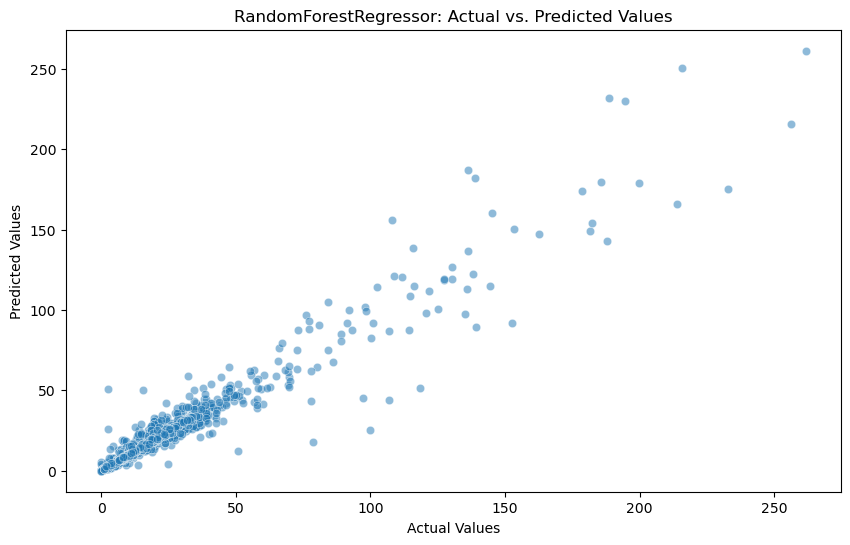

In [18]:
# Train RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error (MSE):", mse)

# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RandomForestRegressor: Actual vs. Predicted Values')
plt.show()


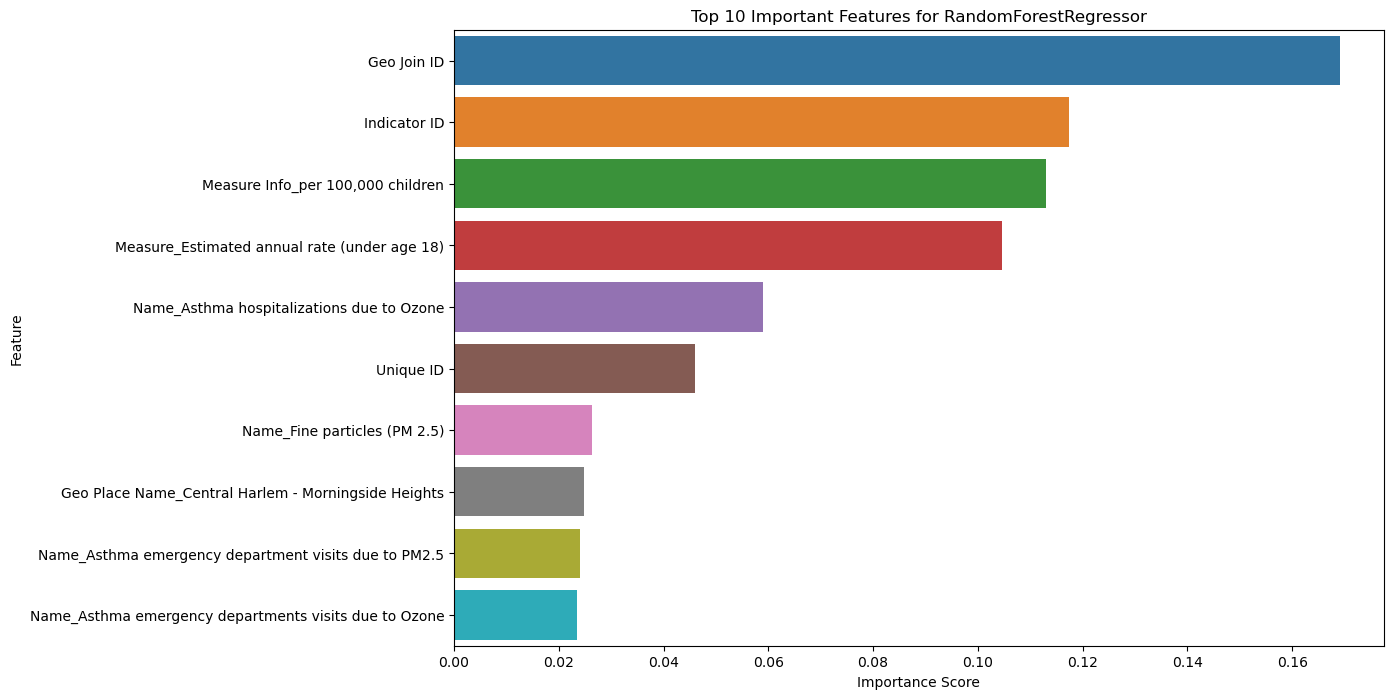


Top 10 Important Features:
                                              Feature  Importance
2                                         Geo Join ID    0.169031
1                                        Indicator ID    0.117412
33                  Measure Info_per 100,000 children    0.113004
25       Measure_Estimated annual rate (under age 18)    0.104565
8           Name_Asthma hospitalizations due to Ozone    0.058941
0                                           Unique ID    0.045985
15                       Name_Fine particles (PM 2.5)    0.026348
59  Geo Place Name_Central Harlem - Morningside He...    0.024835
6   Name_Asthma emergency department visits due to...    0.024143
7   Name_Asthma emergency departments visits due t...    0.023417


In [19]:
# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:10])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Important Features for RandomForestRegressor')
plt.show()

# Display top contributing features
print("\nTop 10 Important Features:")
print(feature_importance_df.head(10))

In [26]:
#connecting to MongoDB for data storage

In [20]:
from pymongo import MongoClient

In [22]:
# Connect to MongoDB
client = MongoClient('localhost', 27017)# Convert DataFrame to list of dictionaries
data = df1.to_dict('records')

In [23]:
# Specify the database and collection
db = client['air_quality_db']
collection = db['air_quality_collection']

In [24]:
# Convert DataFrame to list of dictionaries
data = df1.to_dict('records')

In [25]:
# Insert data into MongoDB
collection.insert_many(data)

InsertManyResult([ObjectId('662829681d3b3dce821fba99'), ObjectId('662829681d3b3dce821fba9a'), ObjectId('662829681d3b3dce821fba9b'), ObjectId('662829681d3b3dce821fba9c'), ObjectId('662829681d3b3dce821fba9d'), ObjectId('662829681d3b3dce821fba9e'), ObjectId('662829681d3b3dce821fba9f'), ObjectId('662829681d3b3dce821fbaa0'), ObjectId('662829681d3b3dce821fbaa1'), ObjectId('662829681d3b3dce821fbaa2'), ObjectId('662829681d3b3dce821fbaa3'), ObjectId('662829681d3b3dce821fbaa4'), ObjectId('662829681d3b3dce821fbaa5'), ObjectId('662829681d3b3dce821fbaa6'), ObjectId('662829681d3b3dce821fbaa7'), ObjectId('662829681d3b3dce821fbaa8'), ObjectId('662829681d3b3dce821fbaa9'), ObjectId('662829681d3b3dce821fbaaa'), ObjectId('662829681d3b3dce821fbaab'), ObjectId('662829681d3b3dce821fbaac'), ObjectId('662829681d3b3dce821fbaad'), ObjectId('662829681d3b3dce821fbaae'), ObjectId('662829681d3b3dce821fbaaf'), ObjectId('662829681d3b3dce821fbab0'), ObjectId('662829681d3b3dce821fbab1'), ObjectId('662829681d3b3dce821fba